TE Angles : [81.19334204 84.67825187 88.22256106]
TM Angles : [81.17192654 84.6599209  88.21568695]
Beta TE : [6008816.42461777 6054292.30038697 6077576.28476623]
Beta TM : [6008468.05068715 6054111.56038159 6077553.61356948]


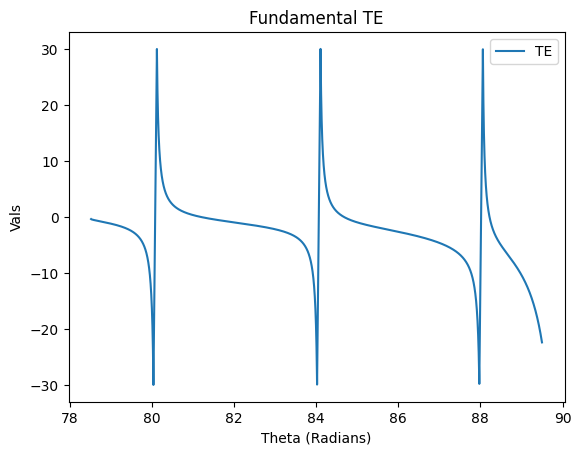

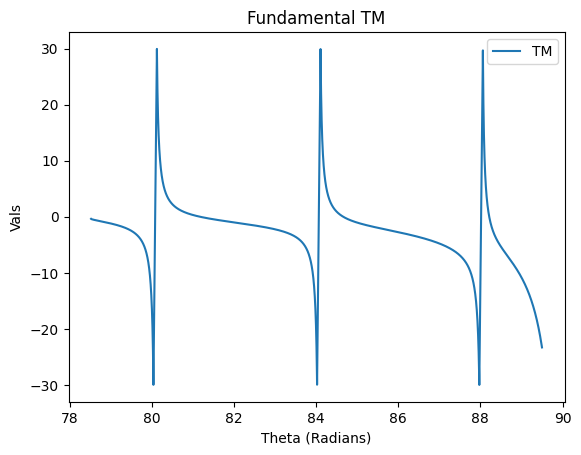

In [24]:
import numpy as np
import matplotlib.pyplot as plt

n1 = 1.5
n2 = 1.47
coreThickness = 15 * 10**(-6)
wavelength = 1.55 * 10**(-6)
#normalizedThickness = ((coreThickness * np.pi)/wavelength)*np.sqrt(n1**2 - n2**2)
k = (2 * np.pi)/wavelength
criticalAngle = np.arcsin(n2/n1)
thetas = np.linspace(criticalAngle, 89.5, 1000000)
inv180 = 1/180
thetas = (thetas * np.pi) * inv180
n2overn1 = n2/n1


def TE (thetaRad):
    left = np.tan(0.5*(k * n1 * coreThickness * np.cos(thetaRad)))
    top = np.sqrt(np.sin(thetaRad)**2 - (n2overn1)**2)
    bottom = np.cos(thetaRad)
    return left - (top/bottom)

def TM (thetaRad):
    left = np.tan(0.5*(k * n1 * coreThickness * np.cos(thetaRad)))
    top = np.sqrt(np.sin(thetaRad)**2 - (n2overn1)**2)
    bottom = np.cos(thetaRad) * (n2overn1)**2
    return left - (top/bottom)


def Simplify (y, x):
    Angles = []
    for i in range(len(x)):
        if (abs(y[i]) < 10**(-2)):
            
            skip = False
            for e in Angles:
                if (abs(e - x[i]) < 10**(-2)):
                    skip = True
                    break
            
            if (skip):
                continue
            
            Angles.append(x[i])
            
    return Angles
    
TEs = []
TMs = []
xVals = []


for i in thetas:
    
    if i < criticalAngle:
        continue

    tm = TM(i)
    te = TE(i)
    
    if (abs(tm) > 30):
        continue

    if (abs(te) > 30):
        continue
    
    TMs.append(tm)
    TEs.append(te)
    xVals.append(i)

    
TEAngles = Simplify(TEs, xVals)
TMAngles = Simplify(TMs, xVals)

BetaTE = k * n1 * np.sin(TEAngles)
BetaTM = k * n1 * np.sin(TMAngles)

xVals = (np.array(xVals) * 180)/np.pi
TEAngles = (np.array(TEAngles) * 180)/np.pi
TMAngles = (np.array(TMAngles) * 180)/np.pi

print(f"TE Angles : {TEAngles}")
print(f"TM Angles : {TMAngles}")
print(f"Beta TE : {BetaTE}")
print(f"Beta TM : {BetaTM}")

# First Graph for TE
plt.figure()  # Create a new figure
plt.title("Fundamental TE")
plt.plot(xVals, TEs, label="TE")
plt.xlabel("Theta (Radians)")
plt.ylabel("Vals")
plt.legend()
plt.show()

# Second Graph for TM
plt.figure()  # Create a new figure
plt.title("Fundamental TM")
plt.plot(xVals, TMs, label="TM")
plt.xlabel("Theta (Radians)")
plt.ylabel("Vals")
plt.legend()
plt.show()

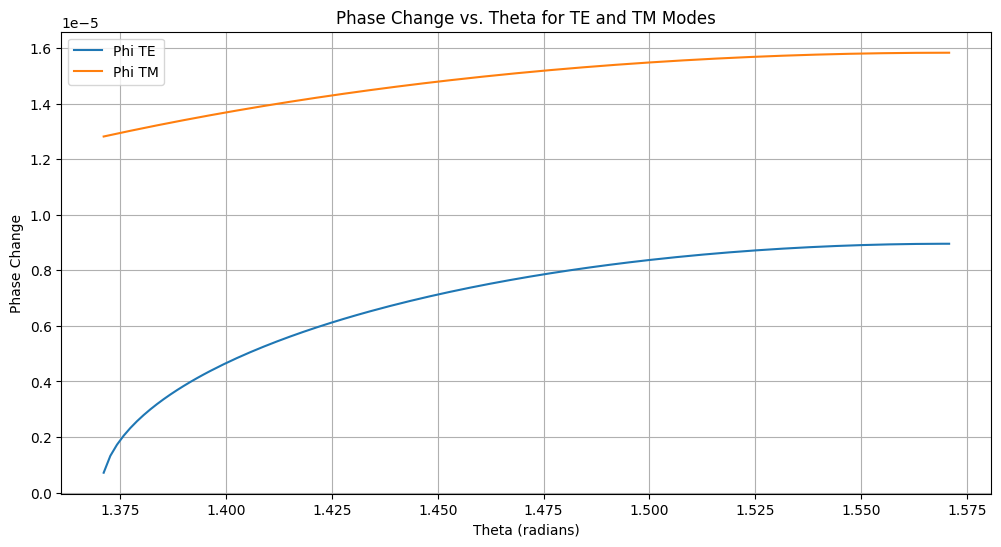

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
n1 = 1.50  # Refractive index of the core
n2 = 1.47  # Refractive index of the cladding
lambda_ = 1.55e-6  # Wavelength in meters
d = 15e-6  # Core thickness in meters
k = 2 * np.pi / lambda_  # Wave number

# Function to calculate phase changes and propagation constants
def calculate_modes(n1, n2, d, k):
    theta_range = np.linspace(0, np.pi/2, 1000)
    phi_te = []
    phi_tm = []
    beta_te = []
    beta_tm = []
    realTheta = []

    for theta in theta_range:
        if np.sin(theta) > n2 / n1:
            # Calculate phi for TE mode
            sin_phi_te = n1 * np.sin(theta)
            phi_te_val = 2 * d * np.sqrt(sin_phi_te**2 - n2**2)
            phi_te.append(phi_te_val)
            beta_te.append(k * np.cos(theta))
            
            # Calculate phi for TM mode
            sin_phi_tm = (n1/n2)**2 * sin_phi_te
            phi_tm_val = 2 * d * np.sqrt(sin_phi_tm**2 - n2**2)
            phi_tm.append(phi_tm_val)
            beta_tm.append(k * np.cos(theta))
            realTheta.append(theta)

    return realTheta, np.array(phi_te), np.array(phi_tm), np.array(beta_te), np.array(beta_tm)

# Plotting
theta_range, phi_te, phi_tm, beta_te, beta_tm = calculate_modes(n1, n2, d, k)

plt.figure(figsize=(12, 6))
plt.plot(theta_range, phi_te, label='Phi TE')
plt.plot(theta_range, phi_tm, label='Phi TM')
plt.xlabel('Theta (radians)')
plt.ylabel('Phase Change')
plt.title('Phase Change vs. Theta for TE and TM Modes')
plt.legend()
plt.grid(True)
plt.show()
